# Central Limit Thoerem (CLT)
- It states that the distributons of the sample means will approach (approximates) to normal distribution.
- No matter the distribution of population, the distribution of sample means will be normal.
## Condition required for CLT:
1. Sample size should be large enough, i.e typicall greater or equal to 30
2. Sample drawn from finite population or infinite population with fine variance

> NOTE: The average of sample means will be close enough to population mean. The emperical mean from the sample mean is given within a interval (which is defined by confidence interval)
> The variance of population is given as:
> $$ Variance\ of\ population (\sigma^2) = \frac{Sample\ variance}{number\ of\ samples} $$

## Empirical Rule:
- In normal data:
- $68 \%$ of confidence interval lies in between the range of $-1\sigma\quad to\quad +1\sigma$
- $95 \%$ of confidence interval lies in between the range of $-2\sigma\quad to\quad +2\sigma$
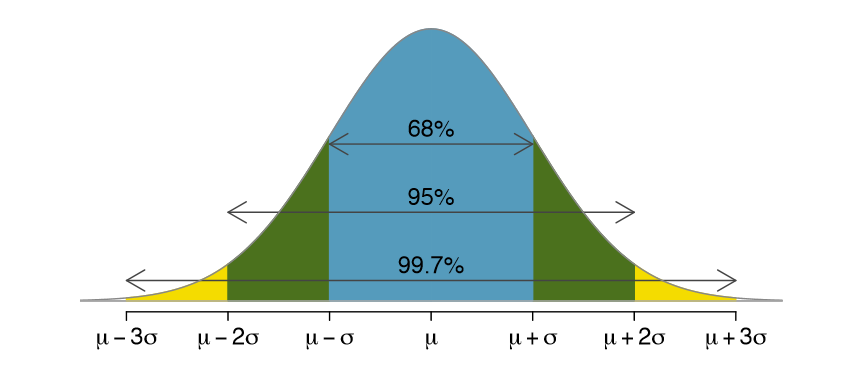

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../adult.0.train', header = None)
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss', 'hours-per-week','native-country','income']

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,65,Private,170939,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,6723,0,40,United-States,<=50K
1,30,Private,96287,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
2,21,Private,314182,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K
4,30,Private,118056,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24421 non-null  int64 
 1   workclass       24421 non-null  object
 2   fnlwgt          24421 non-null  int64 
 3   education       24421 non-null  object
 4   education-num   24421 non-null  int64 
 5   marital-status  24421 non-null  object
 6   occupation      24421 non-null  object
 7   relationship    24421 non-null  object
 8   race            24421 non-null  object
 9   gender          24421 non-null  object
 10  capital-gain    24421 non-null  int64 
 11  capital-loss    24421 non-null  int64 
 12  hours-per-week  24421 non-null  int64 
 13  native-country  24421 non-null  object
 14  income          24421 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


### Asssumptions:
- Lets consider the the `age` as a population
- From the population grab 50 samples randomly for 100 times
- i.e $sample\ size\ = 50$, $Number\ of\ sample\ = 100$

In [5]:
df['age'].isna().sum()

np.int64(0)

- The `age` features has no null values

In [6]:
samples = []
for i in range(100):
    samples.append(df['age'].sample(50).values.tolist())

In [7]:
samples = np.array(samples)

In [8]:
sample_means = []
for x in samples:
    sample_means.append(x.mean())

In [9]:
sample_means = np.array(sample_means)
sample_means.shape

(100,)

# Lets see the distribution of sample means

In [10]:
import seaborn as sns

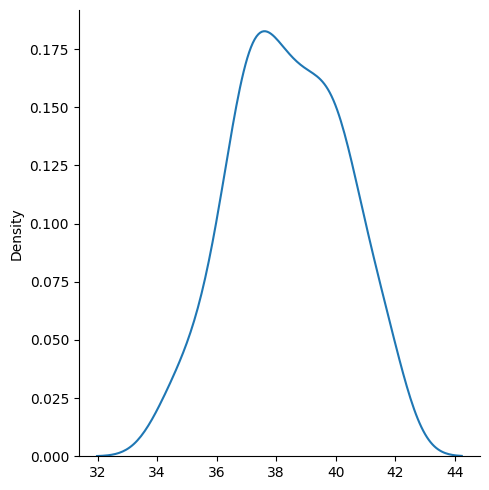

In [11]:
sns.displot(data = sample_means, kind = 'kde');

## Lets compare the population mean and average sample mean

In [12]:
# we know
n = 50

In [13]:
# Sample Standard deviation:
sample_std = sample_means.std()

In [14]:
# From the imperical rule, let the confidence interval be 95%
lower_range = sample_means.mean() - 2*(sample_std)/np.sqrt(n)
upper_range = sample_means.mean() + 2*(sample_std)/np.sqrt(n)

- The division by $\sqrt{n}$ is because the the relation between the population standard deviation and sample standard deviation is given as:
$$ Population\ \sigma = \frac{Sample\ \sigma}{\sqrt{n}} $$

In [15]:
print('From the CLT with the confidence interval of 95 %, the average age is in the range:')
print(f' {lower_range}', '-', f'{upper_range}')

From the CLT with the confidence interval of 95 %, the average age is in the range:
 37.87752665957456 - 38.924073340425444


- Lets check if the population mean lies in the range

In [16]:
df['age'].mean()

np.float64(38.71176446500962)